# Support Vector Regression (SVR)


## Importing the libraries


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Importing the dataset


In [25]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


In [26]:
print(X)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [27]:
print(y)


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [28]:
y = y.reshape((len(y), 1))


In [29]:
print(y)


[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling


In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [31]:
X


array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [32]:
y


array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset


In [33]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)


c:\Python\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result


In [34]:
sc_y.inverse_transform(regressor.predict(
    sc_X.transform([[6.5]])).reshape(-1, 1))


array([[170370.0204065]])

## Visualising the SVR results


[[ 73474.15615697]
 [ 70786.94584626]
 [ 88213.00902103]
 [108254.98574956]
 [122574.52250599]
 [145503.10688572]
 [209410.23132923]
 [330606.89204569]
 [471671.95587315]
 [557821.75899897]]


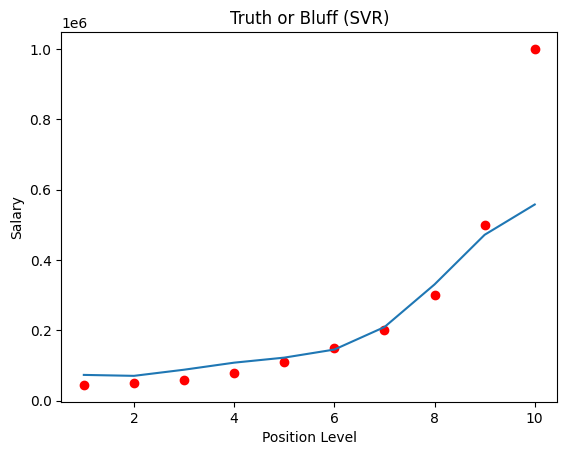

In [35]:
y_pred = sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1))
print(y_pred)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(
    regressor.predict(X).reshape(-1, 1)))
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


## Visualising the SVR results (for higher resolution and smoother curve)


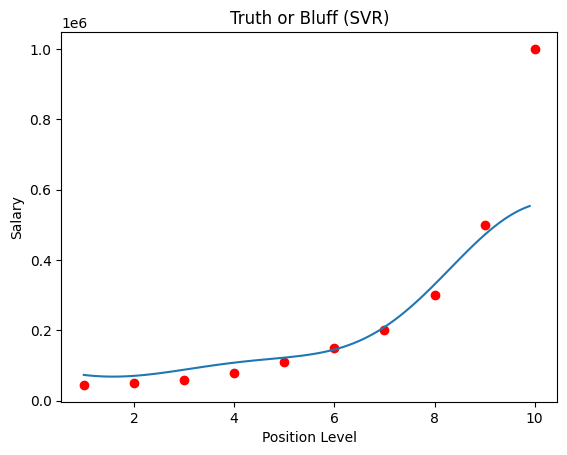

In [36]:
X_original = sc_X.inverse_transform(X)
y_original = sc_y.inverse_transform(y)
plt.scatter(X_original, y_original, color='red')
X_plot = np.arange(min(X_original), max(X_original), 0.1)
X_plot = X_plot.reshape((len(X_plot), 1))
y_pred = sc_y.inverse_transform(regressor.predict(
    sc_X.transform(X_plot)).reshape(-1, 1))
plt.plot(X_plot, y_pred)
plt.title(f'Truth or Bluff (SVR)')
plt.xlabel(f'Position Level')
plt.ylabel('Salary')
plt.show()
